# Ford GoBike System
## by Mustafa Ahmed

## Investigation Overview

Our goal is to find out how gender, user type and weekday affect  number of trips and duration.

## Dataset Overview

The dataset have 10 columns with 174952 observations. Our main focus will be on (duration_min, user_type, member_gender, age).

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
go_bike_cleaned = pd.read_csv('go_bike_cleaned.csv')
go_bike_cleaned.head()

,duration_min,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,35,3
1,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,47,3
2,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,30,3
3,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,45,3
4,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,60,3


## Duration and Age
This plot shows that age has a great effect on trip duration. As users get older 
(maybe after 45), they have shorter trips and this is normal.

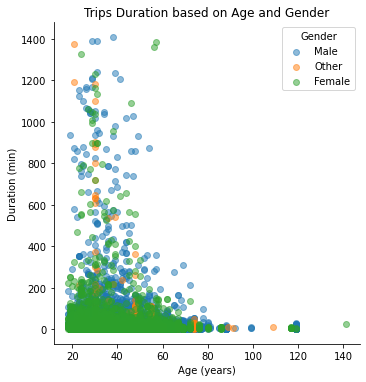

In [19]:
sb.lmplot(data= go_bike_cleaned, x='age' , y="duration_min",  fit_reg=False, hue='member_gender', legend=False, scatter_kws={'alpha':0.5})
plt.legend(title ='Gender')

plt.xlabel('Age (years)')
plt.ylabel('Duration (min)')
plt.title('Trips Duration based on Age and Gender');

## Gender:  (Duration, Number of Users)

As we see here gender has an effect on number of users. We have about 120000 male against approximately 4000 female. For duration, we find that female users take longer trips than male users, but this increase is not signficant (almost 2 minutes)

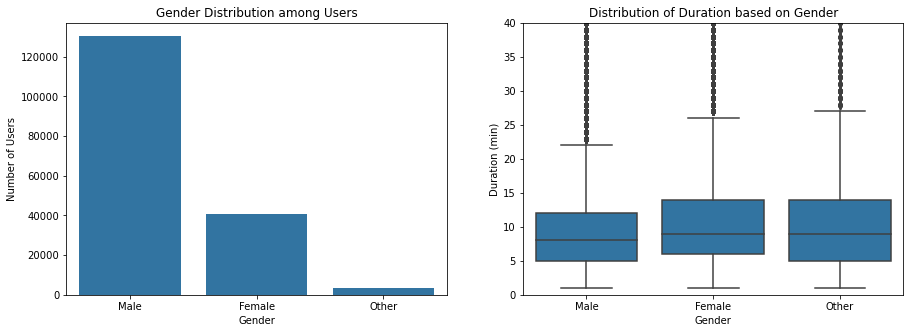

In [20]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

sb.countplot(data = go_bike_cleaned, x = 'member_gender',color = sb.color_palette()[0], order = go_bike_cleaned['member_gender'].value_counts().index, ax= ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Users')
ax[0].set_title('Gender Distribution among Users');

sb.boxplot(data = go_bike_cleaned, x = 'member_gender', y = 'duration_min', order= ['Male', 'Female', 'Other'], color = sb.color_palette()[0],  ax= ax[1])
plt.ylim([0, 40])
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Distribution of Duration based on Gender')
plt.show;

## Weekday:  (Duration, Number of Users)

Left side plot shows that number of trips increase on weekdays and decrease on weekends (Saturday and Sunday) and that is normal. Interestingly, Duration is almost stable throuhgh the whole week with slight longer trips on weekends!

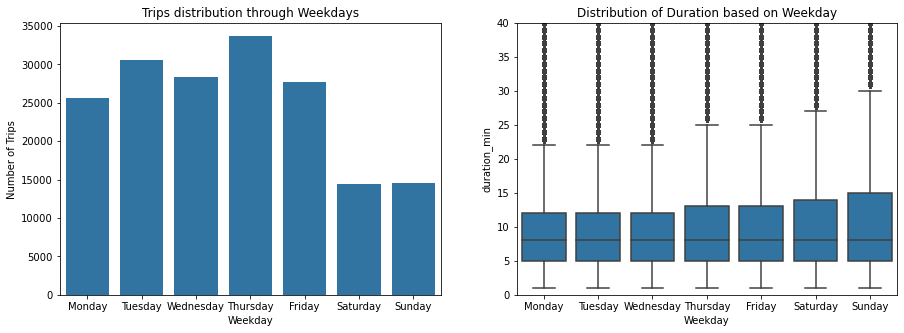

In [21]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

sb.countplot(data = go_bike_cleaned, x = 'weekday', color = sb.color_palette()[0], ax= ax[0])
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Number of Trips')
ax[0].set_title('Trips distribution through Weekdays')

sb.boxplot(data = go_bike_cleaned, x = 'weekday', y = 'duration_min', color = sb.color_palette()[0], ax= ax[1])
plt.ylim([0, 40])
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
ax[1].set_xlabel('Weekday')
ax[1].set_title('Distribution of Duration based on Weekday');

## User Type: (Duration, Number of Trips)

Here we find something intersting, subscribers form 90% of our users, but trip duration for customers is longer than subscribers by approximately 8 minutes.

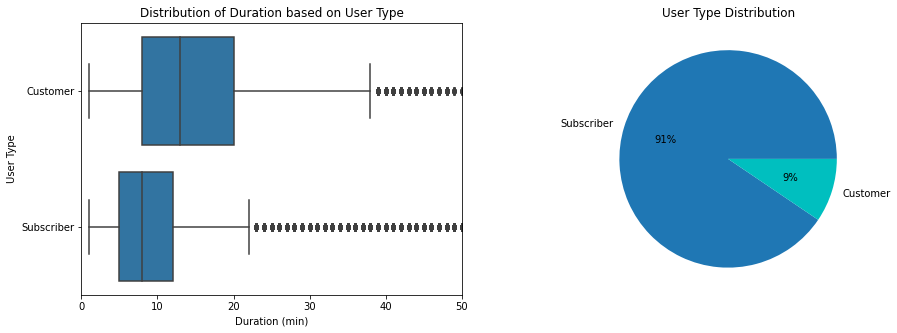

In [22]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

plt.pie(go_bike_cleaned['user_type'].value_counts(), labels=['Subscriber','Customer'], autopct='%1.0f%%', colors=['tab:blue', 'c']);
plt.title('User Type Distribution');

sb.boxplot(data = go_bike_cleaned, y = 'user_type', x = 'duration_min', color = sb.color_palette()[0], ax= ax[0])
ax[0].set_xlim([0, 50])
ax[0].set_xlabel('Duration (min)')
ax[0].set_ylabel('User Type')
ax[0].set_title('Distribution of Duration based on User Type');

## Conclusion

After our analysis, we can say that number of users/trips can be affected by factors such as (weekday, user type, and gender). On other hand, trips duration mostly affected by age. 

In [23]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 698059 bytes to slide_deck.slides.html
